# Model Project - MES

Overview of all necessary packages to run the project.

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ipywidgets import interactive, fixed
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import RicardianModelClass

# Ricardian Model - General Assumptions

The Ricardian Model of International Trade is a theory that explains how gains from trade develop, after the included countries open up to trade. 

The Assumptions of the Ricardian Model:

The basic version assumes two countries, which both produce two goods. Both goods are different from each other, but all countries produce exactly the same type of each good. Labor is the only necessary input for production. Labor is homogeneous in a given country, but labor productivity varies between countries. Additionally, labor is assumed to be mobile across industries in a country, but not across countries. The model assumes perfect competition on both markets for all countries. There are no transportation costs within and between countries. Households provide labor force and consume the produced goods.

The outcome of the Model:

Households maximize their utility function subject to a budget constraint that depends on income, wages and prices. Under autarky, the equilibrium consists of the optimal consumption levels and the resulting utility, which is calculated for all countries individually. Afterwards, all countries open up to trade. Again, the individual consumption levels and utility are calculated for households in all countries. Gains from trade are visualised by the differences in utility between the trade and autarky equilibrium.

The model setup:

Suppose there are two countries, Denmark and Germany. Both countries produce two goods each, beer ($y_1$) and pharmaceuticals ($y_2$). Labor is the only necessary input for production. $L_i$ denotes labor employed, $a_i$ the respective productivity in sector $i = 1,2$. The given industries use the total available labor $L$ in each country and linear production technologies are given by:

$$
y_1 = a_1 L_1  \; and \; y_2 = a_2 L_2
$$

$$
L_1 + L_2 = L
$$

Workers are assumed to be perfectly mobile between industries, but not across countries. While labor is assumed to be homogeneous, labor productivity can vary between countries. Thus, the following inequality determines differences in productivity:

$$
\frac{a_1^{G}}{a_2^{G}} > \frac{a^{DK}_1}{a^{DK}_2}
$$

In this case, Germany is relatively more productive in the production of good 1, while Denmark is relatively more productive in the production of good two. The autarky price for an individual country is given as 

$$
p^a = \frac{a_2}{a_1}
$$

Each country is inhabited by a representative consumer with the following Cobb-Douglas utility function:

$$
U(c_1, c_2) = c_1^{\alpha}  c_2^{1-\alpha}
$$

where $c_1$ and $c_2$ denote consumption of each respective goods. Consumers are financially constrained by the income $I$ they earn. This income is determined by their wage $w$ and the amount of labor they provide. The model assumes income to be fully used for the consumption of goods:

$$
I = wL = py_1 + y_2
$$

The price of $y_2$ is normalized to 1 and same goes for Labour L.




## Analytical solution

The Ricardian Model of International Trade is a general equilibrium model. 
First, we analytically solve the consumption problem under autaky, by deriving the optimal consumption amounts for both goods. 

After opening up to trade, the world price level applies to both countries instead of the autarky price level. The relationship between autarky and world price level determines the specialisation behavior for each country. The world price has to be in between the individual autarky price ratios.

In [2]:
# Step 1: Creating symbols for the relevant variables for sympy
c1 = sm.symbols('c1')
c2 = sm.symbols('c2')
alpha = sm.symbols('alpha')
p = sm.symbols('p')
I = sm.symbols('I')
a1 = sm.symbols('a1')
a2 = sm.symbols('a2')
L = sm.symbols('L')
a_2 = sm.symbols('a2s')
L_ = sm.symbols('Ls')
mu = sm.symbols('mu')
U = sm.symbols('U')
p = sm.symbols('p')
w = sm.symbols('w') 

In [3]:
# Step 2: Defining the Utility function
print('The Utility function for both countries is : ')
objective = c1**(alpha) * c2**(1-alpha)
objective_print = sm.Eq(U, objective)
display(objective_print)

# Step 3: Optimal c1 under autarky 
budget_constraint = sm.Eq(p*c1 + c2, I)

# A. Isolate
c2_from_con = sm.solve(budget_constraint, c2)

# B. Substitute
objective_subs_c1 = objective.subs(c2, c2_from_con[0])

# C. FOC
foc_c1 = sm.diff(objective_subs_c1, c1)

# D. Solve
print('The optimal level of c1 under autarky is : ')
sol_c1 = sm.solve(sm.Eq(foc_c1,0), c1)
c1_eq = sm.Eq(c1, sol_c1[0])
display(c1_eq)

# Step 4: Optimal c2 under autarky

# A. Isolate
c1_from_con = sm.solve(budget_constraint, c1)

# B. Substitute
objective_subs_c2 = objective.subs(c1, c1_from_con[0])

# C. FOC
foc_c2 = sm.diff(objective_subs_c2, c2)

# D. Solve
print('The optimal level of c2 under autarky is : ')
sol_c2 = sm.solve(sm.Eq(foc_c2,0), c2)
c2_eq = sm.Eq(c2, sol_c2[0])
display(c2_eq)

# Step 5: Solving for the world price under trade
opt_c1 = sm.Eq(c1, sol_c1[0])
opt_c1 = sm.solve(opt_c1, I)

opt_c2 = sm.Eq(c2, sol_c2[0])
opt_c2 = sm.solve(opt_c2, I)

# A. solve for p
x = sm.Eq(opt_c1[0], opt_c2[0])
sol_p = sm.solve(x, p)

# B. Marshallian demand to get c1
marshall_c2 = sm.solve(x, c2)

# C. Insert into the budget constraint
budget_constraint_marsh_c1 = sm.Eq(p*c1 + marshall_c2[0], I)

# D. Solve for c1
c1_marsh = sm.solve(budget_constraint_marsh_c1, c1)

# E. Marshallian demand to get c2
marshall_c1 = sm.solve(x, c1)

# F. Insert into the budget constraint
budget_constraint_marsh_c2 = sm.Eq(p * marshall_c1[0] + c2, I)

# G. Solve for c1
c2_marsh = sm.solve(budget_constraint_marsh_c2, c2)

# H. World demand for good 1 
world_sup = sm.Eq(((p + a1 * L) * alpha)/p + (a_2 * L_) * alpha/p, a1 * L)

# I. Solve for the world price
print(' The world price under trade is: ')
world_p = sm.solve(world_sup, p)
pw_eq = sm.Eq(p**w, world_p[0])
display(pw_eq)

The Utility function for both countries is : 


Eq(U, c1**alpha*c2**(1 - alpha))

The optimal level of c1 under autarky is : 


Eq(c1, I*alpha/p)

The optimal level of c2 under autarky is : 


Eq(c2, I*(1 - alpha))

 The world price under trade is: 


Eq(p**w, alpha*(L*a1 + Ls*a2s)/(L*a1 - alpha))

We then also create a lambdify function for the world price for later use in this project.

In [4]:
# Creating a lampdify function for later calculation of the world price 
world_p_func = sm.lambdify(args=(alpha, L, L_, a1, a_2), expr = world_p[0])

## Numerical solution

The Ricardian Model is used to show gains of trade by comparing the trade equilibrium with the individual autarky equilibrium. To illustrate this, we will solve our model under two conditions. 

Firstly, we assume autarky for both countries, such that production and consumption of both goods has to be equal within one country. 
Then, we assume that both countries are allowed to trade. 

Finally, we compare the differences in utility between both scenarios. Under the assumptions of the model, higher amounts of production lead to higher amounts of consumption. Thus, increased production increases the utility and therefore the welfare of the population of both countries.

# Visualisation of the PPFs

Graphical Analysis: PPF

In a Ricardian Model, countries differ in productivity ($a_1$ and $a_2$ in our setup) of their respective industries. This can be shown by Production Possibility Sets (PPS) that contain all possible combinations of labor endowments, that leave no labor unused. The Production Possibility Frontier (PPF) illustrates all possible PPS in a graph. Suppose Denmark is better at producing pharmaceuticals than Germany, while Germany is better at producing beer. We assamune the following individual productivites for each country:

$$
a_1^G = 10, a_2^G = 3, a^{DK}_1 = 4, a^{DK}_2 = 8
$$

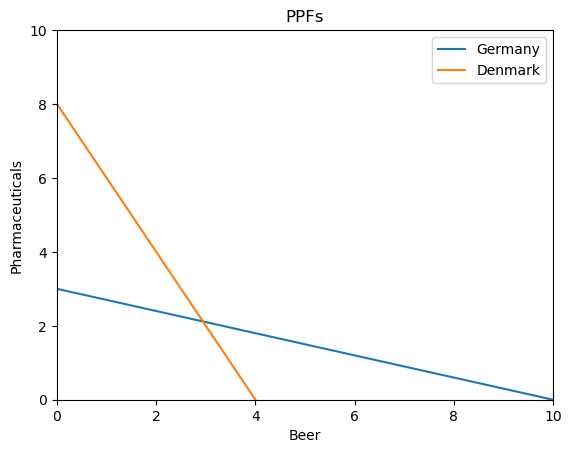

In [5]:
# Production Possibility Frontiers for Denmark and Germany

model = RicardianModelClass()

model.a1_d = 4   #Danish productivity for Beer
model.a2_d = 8   #Danish productivity for Pharmaceuticals
model.a1_g = 10  #German productivity for Beer
model.a2_g = 3   #German productivity for Pharmaceuticals

model.ppf_plot(model.a1_d, model.a2_d, model.a1_g, model.a2_g)

This plot visualises the PPF for Germany (blue) and the PPF for Danmark (Red) with our predefined productivities in both sectors. The slope of Denmark is much steeper than the one of Germany, because the slope is given as $-\frac{a_2}{a_1}$. Thus, the autarky price in Denmark is much higher than the counterpart in Germany.

# Autarky

Under autarky, Denmark and Germany cannot trade. Thus, we calculate the optimal consumption bundles and the resulting utility for each country individually.

# The Case for Germany

For this static analysis, we assume that the parameters are fixed to predefined values. Thus, the parameters for Germany are given as $a_1^g = 10$, $a_2^g = 3$ and $\alpha = 0.5$. Later, we relax the assumptions of predefined variables.

Optimal value of c1 in Germany: 5.000
Optimal value of c2 in Germany: 1.500
The Utility for Germany is: 2.739


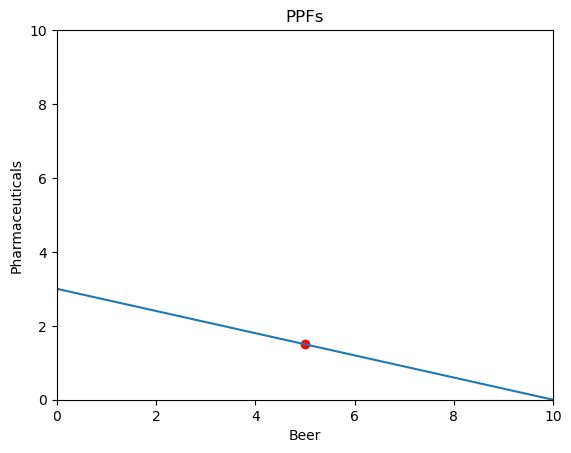

In [6]:
# Case: Germany under autarky

# A. Solve for optimal consumption
model = RicardianModelClass()

# A.1 Insert values for alpha, a_1^G and a_2^G
alpha = 0.5
model.a1_g = 10
model.a2_g = 3

# A.2 Running the solver for the optimal consumption
model.optimal_c1, model.optimal_c2 = model.optimize_autarky(alpha, model.a1_g, model.a2_g)

# A.3 Print the optimal values of c1 and c2
print(f"Optimal value of c1 in Germany: {model.optimal_c1:.3f}")
print(f"Optimal value of c2 in Germany: {model.optimal_c2:.3f}")

# A.4 The utility for Germany
uG = model.utility( [model.optimal_c1, model.optimal_c2], alpha)
print(f"The Utility for Germany is: {uG:.3f}")

# B. Visualize PPF
model.ppf_plot_individual(model.a1_g, model.a2_g, model.optimal_c1, model.optimal_c2)

The German PPF is given by the blue line. The red dot is the optimal production and consumption amounts of both goods under autarky. The optimal consumption bundle is located on the PPF, because in any case below the PPF not all resources are used. Although the consumers have the same preference for both goods, they consume more of good one compared to good two, because the autarky price of good one is relatively low due to the production advantages.

# The Case for Denmark

For this static analysis, we assume that the parameters are fixed to predefined values. Thus, the parameters for Denmark are given as $a_1^d = 4$, $a_2^d = 8$ and $\alpha = 0.5$. Later, we relax the assumptions of predefined variables.

Optimal value of c1 in Denmark: 2.001
Optimal value of c2 in Denmark: 3.999
The Utility for Denmark is: 2.828


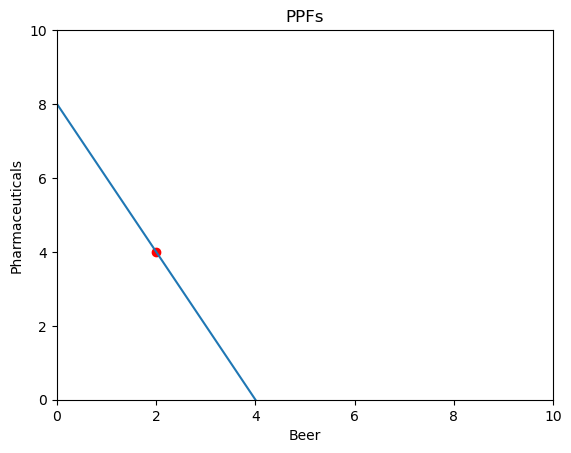

In [7]:
# Case: Denmark under autarky

# A. Solve for optimal consumption
model = RicardianModelClass()

# A.1 Insert values for alpha, a_1^DK and a_2^DK
alpha = 0.5
model.a1_dk = 4
model.a2_dk = 8

# A.2 Running the solver for the optimal consumption
model.optimal_c1, model.optimal_c2 = model.optimize_autarky(alpha, model.a1_dk, model.a2_dk)

# A.3 Print the optimal values of c1 and c2
print(f"Optimal value of c1 in Denmark: {model.optimal_c1:.3f}")
print(f"Optimal value of c2 in Denmark: {model.optimal_c2:.3f}")

# A.4 The utility for Denmark
uDK = model.utility( [model.optimal_c1, model.optimal_c2], alpha)
print(f"The Utility for Denmark is: {uDK:.3f}")


# B. Visualize PPF
model.ppf_plot_individual(model.a1_dk, model.a2_dk, model.optimal_c1, model.optimal_c2)
plt.show()

The Danish PPF is given by the blue line. The red dot is the optimal production and consumption amounts of both goods under autarky. The optimal consumption bundle is located on the PPF, because in any case below the PPF not all resources are used. Although the consumers have the same preference for both goods, they consume more of good two compared to good one, because the autarky price of good one is relatively high due to the production disadvantages.

# Trade

# Specialisation after Opening up to Trade

We will now be using the lambdify function which we derived in the analytical solution to calculate the world price after opening up to trade.

In [8]:
# A. Definition of Parameters
alpha_vec = 0.5 # The preference for good 1
L_val = 1 # normalize the labour force to 1 
L__val = 1 # normalize the labour force to 1 
a1_val = 10 # Productivity G in good 1
a_2_val = 8 # Productivity DK in good 2
a1_g = 10 # Productivity G in good 1
a2_g = 3 # Productivity G in good 2
a1_dk = 4 # Productivity DK in good 1
a2_dk = 8 # Productivity DK in good 2

# B. Calculate the world price
price_world = world_p_func(alpha_vec, L_val, L__val, a1_val, a_2_val)

# C. Calculate the autarky price for good 1 in Germany
autarky_price_g =  a2_g/a1_g

# D. Calculate the autarky price for good 1 in Denmark
autarky_price_dk = a2_dk/a1_dk

# E. Print the Prices
print(f"The world price is: {price_world:.3f}")
print(f"The autarky price for Germany in good 1 is: {autarky_price_g:.3f}")
print(f"The autarky price for Denmark in good 1 is: {autarky_price_dk:.3f}")

The world price is: 0.947
The autarky price for Germany in good 1 is: 0.300
The autarky price for Denmark in good 1 is: 2.000


The calculation of the three prices show, that the following relation holds: $p^G < p^w < p^{DK}$. 

We assume, that both countries have a labor force normalised to one. Consequently, both countries have the same size. Due to the lower autarky price in good 1 (relative to the world price), Germany specialises in the production of beer (good 1) and Denmark specialises in the production of pharmaceuticals (good 2). Because we assume an equal size for both countries, we have a full specialisation in the corresponding good. 

# Optimal Consumption after Opening up to Trade

As previously shown, the given price relation under trade results in full specialisation for each country. Consequently, 10 units of beer and 8 units of pharmaceuticals are available. Assuming $ \alpha = 0.5 $, both countries value both products equally. Given the composition of products, each country consumes 5 units of beer and 4 units of pharmaceuticals. This equilibrium is given in the green dot. The red and blue dots represent the autarky equilibrium of Denmark and Germany. The graph shows how trade leads to higher consumption in both countries. 

In [19]:
# Building a solver for the trade problem

# Define the utility function
def utility_world(x, alpha):
    c1_DE = x[0]
    c2_DE = x[1]
    c1_DK = x[2]
    c2_DK = x[3]
    A = c1_DE ** alpha
    B = c2_DE ** (1 - alpha)
    C = c1_DK ** alpha
    D = c2_DK ** (1 - alpha)
    return -(A * B + C * D)

# Define the constraints
def productionconstraint_1(x):
    c1_DE = x[0]
    c1_DK = x[2]
    return a1_DE - c1_DE - c1_DK

def productionconstraint_2(x):
    c2_DE = x[1]
    c2_DK = x[3]
    return a2_DK - c2_DK - c2_DE

def incomeconstraint_1(x):
    c1_DE = x[0]
    c2_DE = x[1]
    P = (alpha * (a1_DE + a2_DK)) / (a1_DE - alpha)
    return I_DE - c1_DE * P - c2_DE

def incomeconstraint_2(x):
    c1_DK = x[2]
    c2_DK = x[3]
    P = (alpha * (a1_DE + a2_DK)) / (a1_DE - alpha)
    return I_DK - c1_DK * P - c2_DK

# Set up
# set up the parameters
alpha = 0.7
a1_DE = 10
a2_DK = 8
I_DE = 9
I_DK = 9

# set up the bounds
bound = (0, 10)
bounds = (bound, bound, bound, bound)

# set up the constraints
prodconst_1 = {'type': 'eq', 'fun': productionconstraint_1}
prodconst_2 = {'type': 'eq', 'fun': productionconstraint_2}
incconst_1 = {'type': 'ineq', 'fun': incomeconstraint_1}
incconst_2 = {'type': 'ineq', 'fun': incomeconstraint_2}

# Set up the solver
# set up the initial guess
x0 = (1, 1, 1, 1)

# Call the solver
result = optimize.minimize(utility_world, x0, args=(alpha,), method='SLSQP', bounds=bounds, constraints=[prodconst_1, prodconst_2, incconst_1, incconst_2])

# unpack solutions
c1_Germany = result.x[0]
c2_Germany = result.x[1]
c1_Denmark = result.x[2]
c2_Denmark = result.x[3]

# print results
print(f'The consumption from Germany for beer is            : {c1_Germany:.2f}')
print(f'The consumption from Germany for pharmaceuticals is : {c2_Germany:.2f}')
print(f'The consumption from Denmark for beer is            : {c1_Denmark:.2f}')
print(f'The consumption from Denmark for pharmaceuticals is : {c2_Denmark:.2f}')

The consumption from Germany for beer is            : 4.16
The consumption from Germany for pharmaceuticals is : 3.37
The consumption from Denmark for beer is            : 4.16
The consumption from Denmark for pharmaceuticals is : 3.37


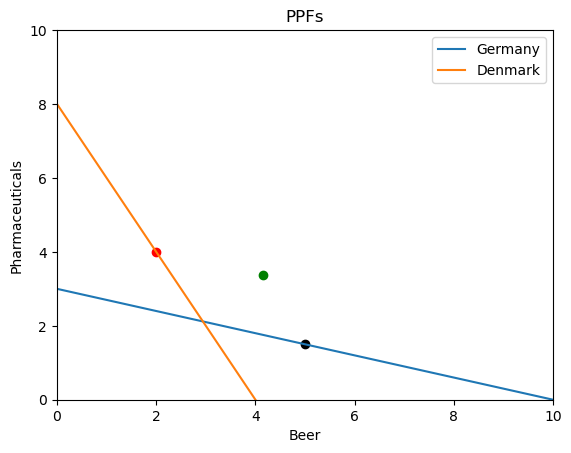

Utility for Germany under trade: 3.903
Utility for Denmark under trade: 3.903


In [31]:
# Define the parameters
a1_g = 10
a2_g = 3
a1_d = 4
a2_d = 8

# Create the plot
    # Plots both PPFs with optimal points in autarky and trade
def ppf_plot_trade(a1_d, a2_d, a1_g, a2_g):
    # points in German ppf
    x1 = [a1_g, 0]  
    y1 = [0, a2_g]  

    # points in Danish ppf
    x2 = [a1_d, 0]  
    y2 = [0, a2_d]  

     # Plotting the lines
    plt.plot(x1, y1, label='Germany')
    plt.plot(x2, y2, label='Denmark')

    # Adding labels and title
    plt.xlabel('Beer')
    plt.ylabel('Pharmaceuticals')
    plt.title('PPFs')
    plt.xlim(0, 10)
    plt.ylim(0, 10)

    # add autarky equlibrium points Germany
    plt.scatter(5, 1.5, color='black')

    # add autarky equlibrium points Denmarl
    plt.scatter(2, 4, color='red')

    # add the trade equlibirum 
    plt.scatter(c1_Germany, c2_Germany, color='green')

    # Adding a legend
    plt.legend()

     # Displaying the plot
    plt.show()

ppf_plot_trade(a1_d, a2_d, a1_g, a2_g)

# Calculating the utility for Germany
utility_trade = model.utility([c1_Germany, c2_Germany], alpha)
print(f"Utility for Germany under trade: {utility_trade:.3f}")

# Calculating the utility for Denmark
utility_trade = model.utility([c1_Denmark, c2_Denmark], alpha)
print(f"Utility for Denmark under trade: {utility_trade:.3f}")


# Further analysis

We will now extend the analysis in the autarky case by varying the elasticity of substitution $\alpha$.

In [11]:
# Varying alpha 
alpha_vec = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1])

# Germany under autarky
model = RicardianModelClass()

# insert values
a1_g = 10
a2_g = 3

# loop over the alpha vector to calculate optimal consumption and utility
for i in alpha_vec: 
    optimal_c1, optimal_c2 = model.optimize_autarky(i, a1_g, a2_g)
    print(f'optimal c1: {optimal_c1:1.3f}',"&", f'optimal c2: {optimal_c2:1.3f}', 'alpha = ', i)
    # the utility for Germany
    uDK = model.utility( [optimal_c1, optimal_c2], alpha)
    print(f"The Utility for Germany is: {uDK:.3f}")

optimal c1: 0.000 & optimal c2: 3.000 alpha =  0.0
The Utility for Germany is: 0.000
optimal c1: 1.000 & optimal c2: 2.700 alpha =  0.1
The Utility for Germany is: 1.643
optimal c1: 2.000 & optimal c2: 2.400 alpha =  0.2
The Utility for Germany is: 2.191
optimal c1: 2.999 & optimal c2: 2.100 alpha =  0.3
The Utility for Germany is: 2.510
optimal c1: 3.999 & optimal c2: 1.800 alpha =  0.4
The Utility for Germany is: 2.683
optimal c1: 6.000 & optimal c2: 1.200 alpha =  0.6
The Utility for Germany is: 2.683
optimal c1: 7.000 & optimal c2: 0.900 alpha =  0.7
The Utility for Germany is: 2.510
optimal c1: 8.000 & optimal c2: 0.600 alpha =  0.8
The Utility for Germany is: 2.191
optimal c1: 9.000 & optimal c2: 0.300 alpha =  0.9
The Utility for Germany is: 1.643
optimal c1: 10.000 & optimal c2: 0.000 alpha =  1.0
The Utility for Germany is: 0.000


In [12]:
def plot_ppf(alpha, a1_g, a2_g):
    # Germany under autarky
    model = RicardianModelClass()

    # Calculate optimal consumption levels
    optimal_c1, optimal_c2 = model.optimize_autarky(alpha, a1_g, a2_g)

    # Define a range of values for y1
    y1 = np.linspace(0, 10)

    # Calculate corresponding values of y2 using the given equation
    y2 = a2_g - (a2_g / a1_g) * y1

    # Plot y2G against y1G
    plt.plot(y1, y2)
    plt.xlabel('y1')
    plt.ylabel('y2')
    plt.title('The PPF for Germany')
    plt.xlim(0, 10)
    plt.ylim(0, 10)

    # Add a point at coordinates (optimal_c1, optimal_c2)
    plt.scatter(optimal_c1, optimal_c2, color='red')

    plt.show()

# Set up the interactive widget
interactive_plot = interactive(plot_ppf, alpha=(0, 1, 0.1), a1_g=fixed(10), a2_g=fixed(3))

# Show the widget
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

In [13]:
# Varying alpha     
alpha_vec = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1])

# Denmark under autarky
model = RicardianModelClass()

# Insert values
a1_dk = 4
a2_dk = 8

# Loop over the alpha vector to calculate optimal consumption and utility
for i in alpha_vec: 
    optimal_c1, optimal_c2 = model.optimize_autarky(i, a1_dk, a2_dk)
    print(f'optimal c1: {optimal_c1:1.3f}',"&" , f'optimal c2: {optimal_c2:1.3f}', 'alpha = ', i)
    # The utility for Denmark
    uDK = model.utility( [optimal_c1, optimal_c2], alpha)
    print(f"The Utility for Denmark is: {uDK:.3f}")

optimal c1: 0.000 & optimal c2: 8.000 alpha =  0.0
The Utility for Denmark is: 0.000
optimal c1: 0.400 & optimal c2: 7.200 alpha =  0.1
The Utility for Denmark is: 1.697
optimal c1: 0.800 & optimal c2: 6.399 alpha =  0.2
The Utility for Denmark is: 2.263
optimal c1: 1.200 & optimal c2: 5.600 alpha =  0.3
The Utility for Denmark is: 2.592
optimal c1: 1.601 & optimal c2: 4.798 alpha =  0.4
The Utility for Denmark is: 2.772
optimal c1: 2.401 & optimal c2: 3.198 alpha =  0.6
The Utility for Denmark is: 2.771
optimal c1: 2.801 & optimal c2: 2.399 alpha =  0.7
The Utility for Denmark is: 2.592
optimal c1: 3.200 & optimal c2: 1.600 alpha =  0.8
The Utility for Denmark is: 2.263
optimal c1: 3.599 & optimal c2: 0.802 alpha =  0.9
The Utility for Denmark is: 1.699
optimal c1: 4.000 & optimal c2: 0.000 alpha =  1.0
The Utility for Denmark is: 0.000


In [14]:
def plot_ppf(alpha, a1_dk, a2_dk):
    # Germany under autarky
    model = RicardianModelClass()

    # Calculate optimal consumption levels
    optimal_c1, optimal_c2 = model.optimize_autarky(alpha, a1_dk, a2_dk)

    # Calculate utility
    uDK = model.utility([optimal_c1, optimal_c2], alpha)

    # Define a range of values for y1
    y1 = np.linspace(0, 10)

    # Calculate corresponding values of y2 using the given equation
    y2 = a2_dk - (a2_dk / a1_dk) * y1

    # plot y2G against y1G
    plt.plot(y1, y2)
    plt.xlabel('y1')
    plt.ylabel('y2')
    plt.title('The PPF for Denmark')
    plt.xlim(0, 10)
    plt.ylim(0, 10)

    # Add a point at coordinates (optimal_c1, optimal_c2)
    plt.scatter(optimal_c1, optimal_c2, color='red')

    plt.show()

# Set up the interactive widget
interactive_plot = interactive(plot_ppf, alpha=(0, 1, 0.1), a1_dk=fixed(4), a2_dk=fixed(8))

# Show the widget
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

# Conclusion

In this project we constructed a Ricardian Model of Trade, compared the situations of trade and autarky and have shown the gains from trade. Furthermore, we extended our model to allow for a variation in the parameter $\alpha$ and thus show how this variation affects the consumption bundle and utility of the respective country under autarky.